In [ ]:
### Bank Marketing Effectiveness ###
### Kyle Tadokoro, ktadokor@asu.edu ###
### Richard Kianos, rkianos@asu.edu ###

In [ ]:
import pandas as pd
!pip install tensorflow

In [ ]:
# upload data and mount drive
# Kyle uploading file
from google.colab import drive
drive.mount('/content/drive/')

path = '/content/drive/My Drive/Colab Notebooks/data/bank-additional-full.csv'

bank = pd.read_csv(path, sep=';')
print(bank.head())
print(bank.info())


# Link to site for feature descriptions! https://archive.ics.uci.edu/dataset/222/bank+marketing
# Downloading from site includes 2 zip files.  The one I am thinking we use is the full set under the file name: bank-additional-full.csv

Mounted at /content/drive/
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.

In [ ]:
# Upload data
# Richard uploading file

#file_path = r"C:\Users\Richard Kianos\Downloads\bank-additional-full.csv"
#bank = pd.read_csv(file_path, sep=';')

# Preview Dataset
#print(bank.head())
#bank.info()

#Intro to set
This set is from the UCI archive uploaded in 2014 descibing the data collected over a 30-month period from a portugese bank in their attempts to get clients to subscribe to a bank term deposit.  The target variable y holds the values of either 'yes' or 'no' on whether they subscribed or not.  This is what we will be predicting.  


In [ ]:
# Drop 'duration' column according to reccomendation by dataset post
bank.drop('duration', axis=1, inplace=True)

In [ ]:
# Check shape of set
print('Number of instances: ', bank.shape[0])
print('Number of attributes: ', bank.shape[1] - 1) # -1 for target variable

# Check and print number of null values
print('\nNumber of null values:\n', bank.isnull().sum())

Number of instances:  41188
Number of attributes:  19

Number of null values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#To Do:
- Introduce set and create 1 or 2 plots for exploratory analysis.  #I know we have our target variable already but do you think it would be useful to add some features like interaction_count (total number of interactions with the bank) to add some depth to the set since it's pretty clean already LOL.  
- Non-supervised learning.  Maybe k-means clustering for customer groups based on age, demographics, or behavior.  I feel like we could maybe try and use maybe like PCA or Lasso regularization to implement some kind of Dimensionality Reduction but lmk what you think!
- At least 2 supervised ML techniques with one being ANN.  We could maybe try to run a couple of other ML's in comparison so see how the ANN performs.  

In [ ]:
# Exploratory analysis

# Generate descriptive statistics for numerical columns
numerical_summary = bank.describe()

# Generate descriptive statistics for categorical columns
categorical_summary = bank.describe(include=['object'])

# Display numerical summary
print("Numerical Summary:")
display(numerical_summary)

# Display categorical summary
print("Categorical Summary:")
display(categorical_summary)


Numerical Summary:


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Categorical Summary:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


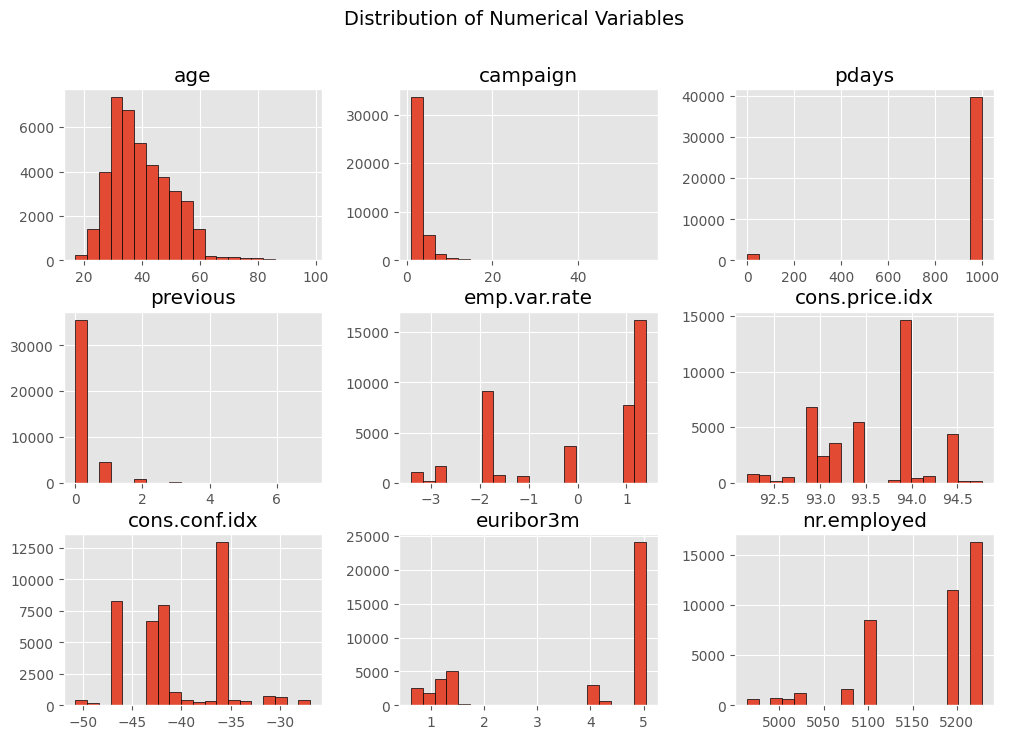

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

# Figure 1: Histogram for numerical variables
bank.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=14)
plt.show()


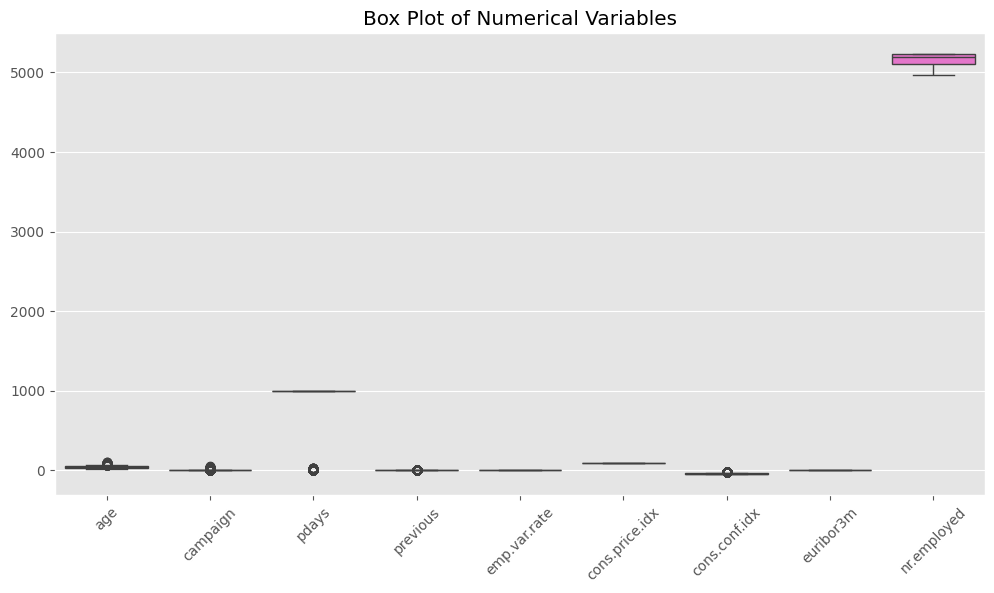

In [ ]:
# Figure 2: Boxplot for numerical variables to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=bank.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Variables")
plt.show()



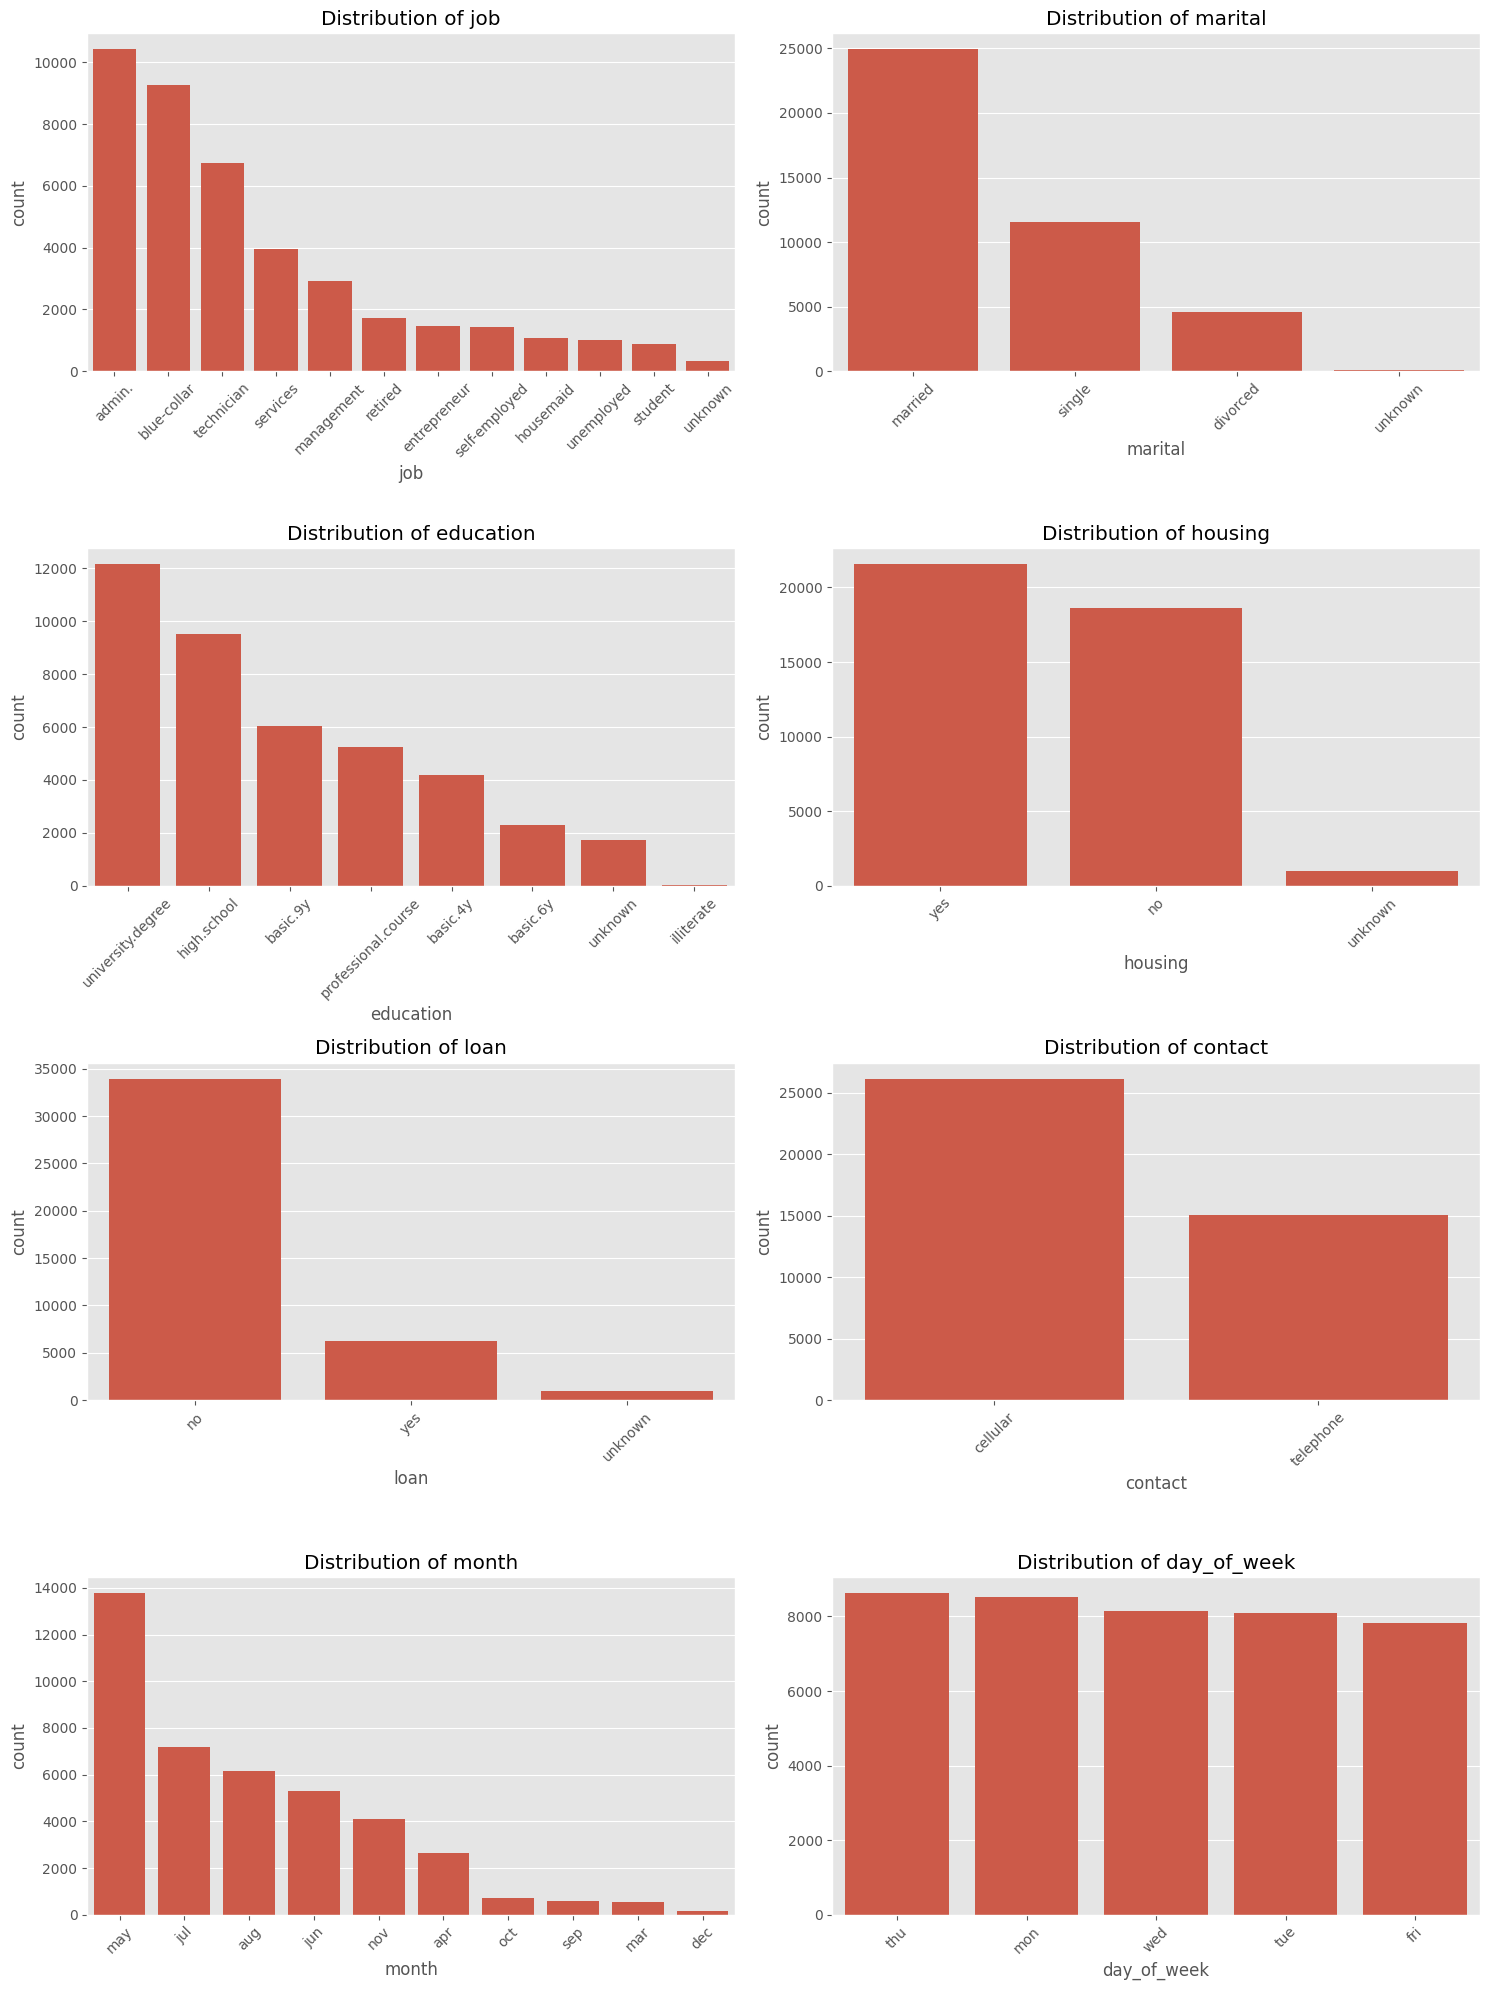

In [ ]:
# Figure 3: Bar chart for categorical variables
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for col, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=bank[col], ax=ax, order=bank[col].value_counts().index)
    ax.set_title(f"Distribution of {col}")

    # Fix the warning by ensuring fixed tick locations
    ax.set_xticks(range(len(bank[col].value_counts().index)))
    ax.set_xticklabels(bank[col].value_counts().index, rotation=45)

plt.tight_layout()
plt.show()


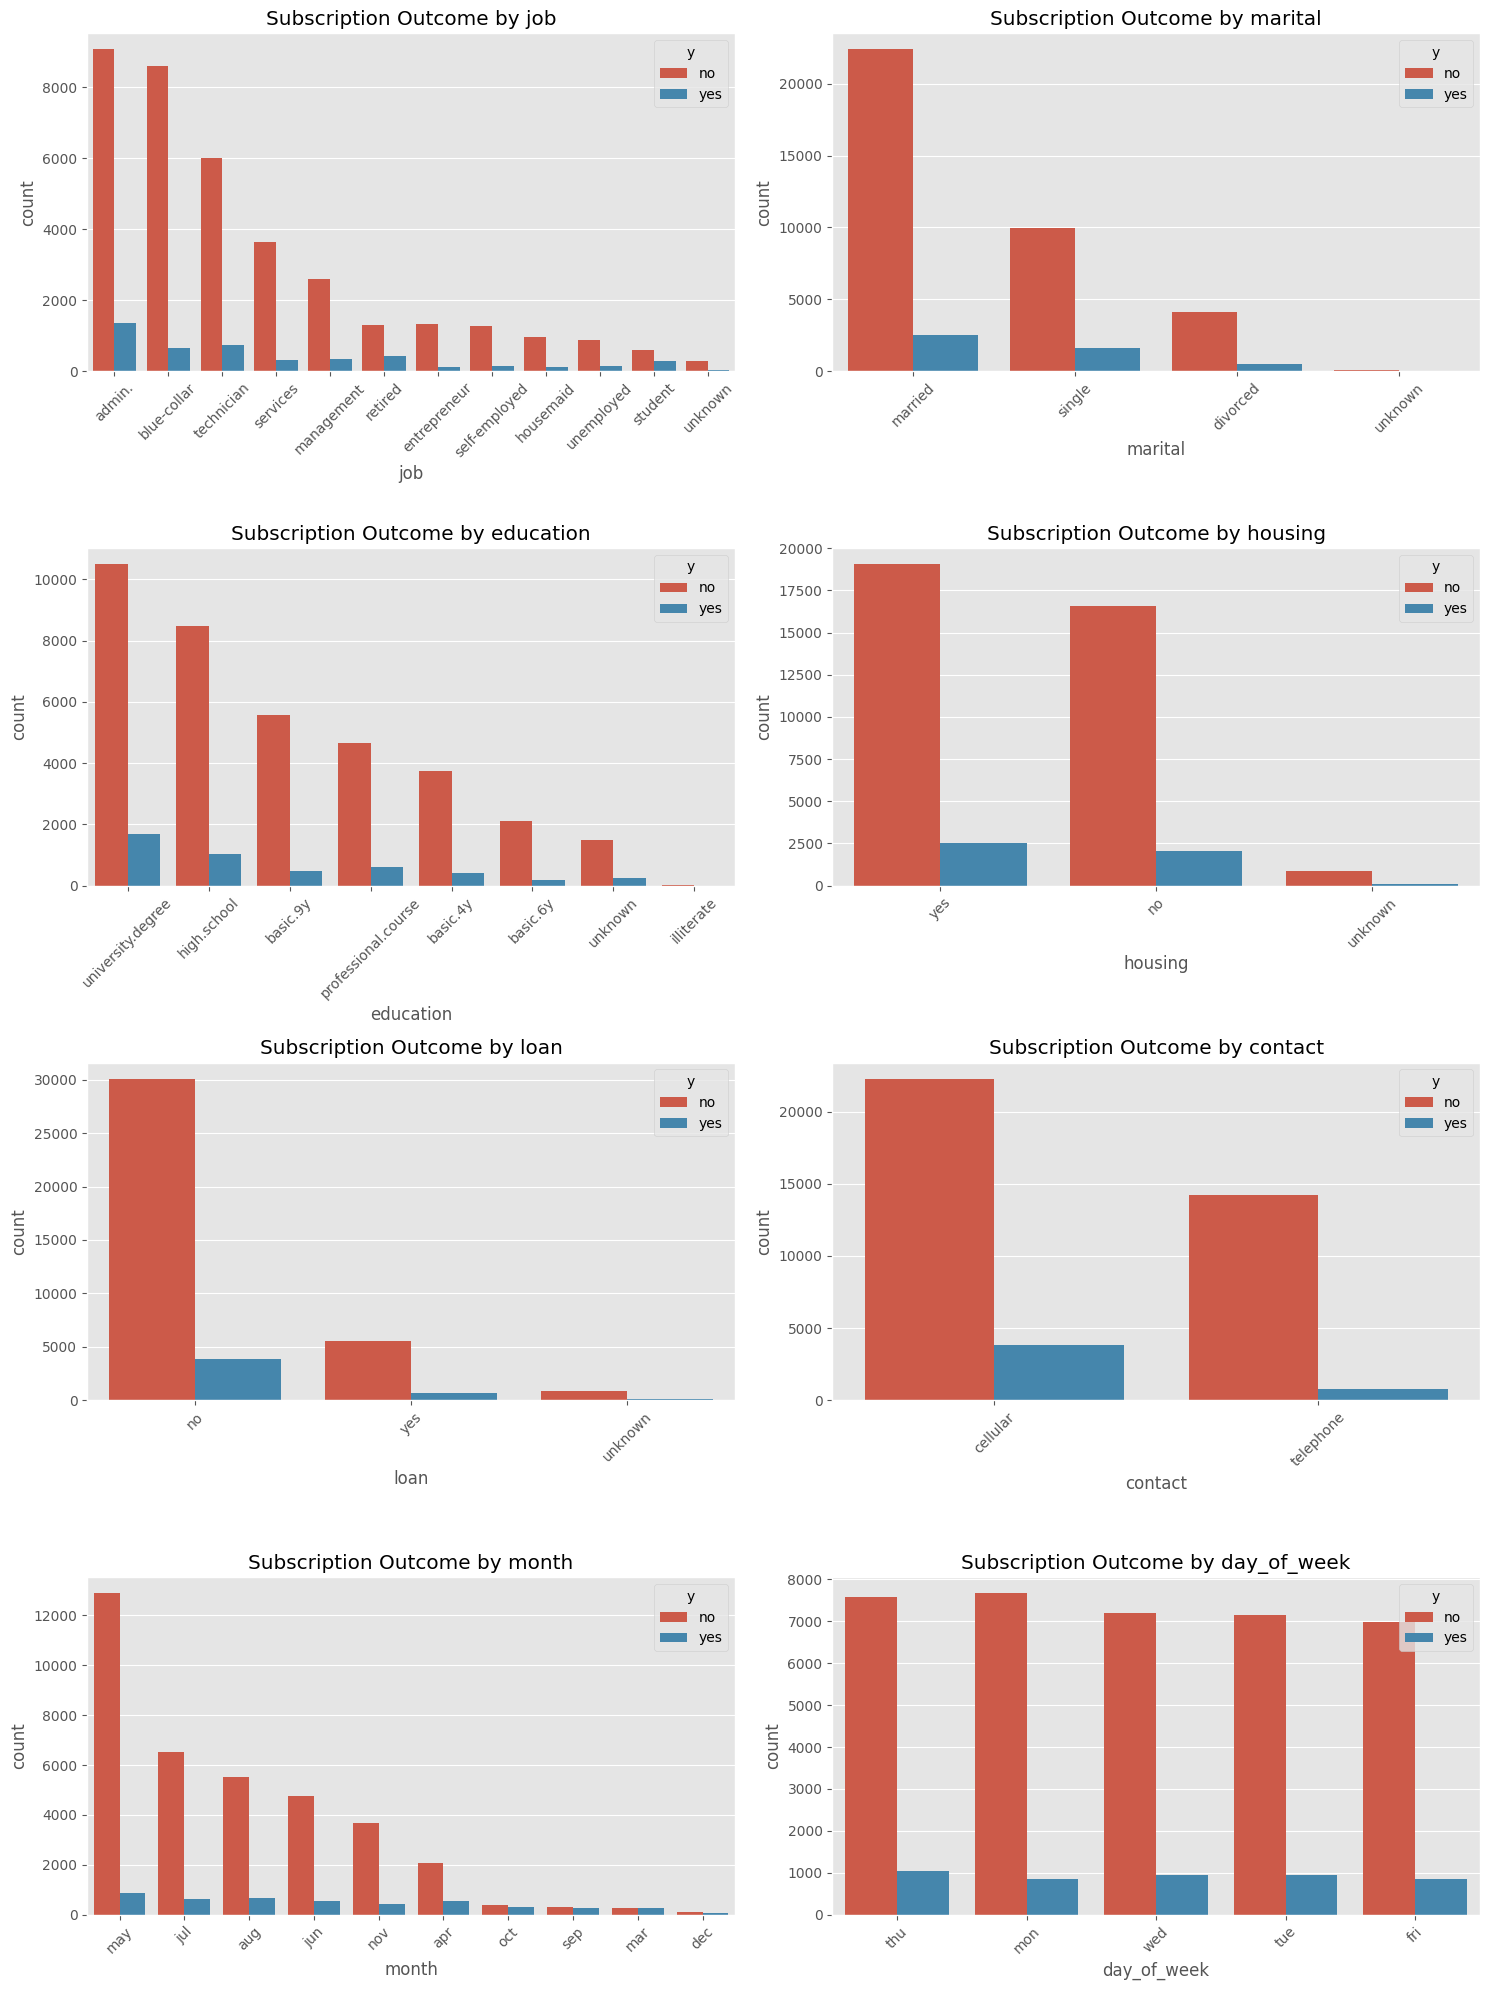

In [ ]:
# Figure 4: Subscription rate comparison for categorical variables
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for col, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=bank[col], hue=bank['y'], ax=ax, order=bank[col].value_counts().index)
    ax.set_title(f"Subscription Outcome by {col}")

    # Fix: Ensure fixed tick positions before setting labels
    ax.set_xticks(range(len(bank[col].value_counts().index)))
    ax.set_xticklabels(bank[col].value_counts().index, rotation=45)

plt.tight_layout()
plt.show()


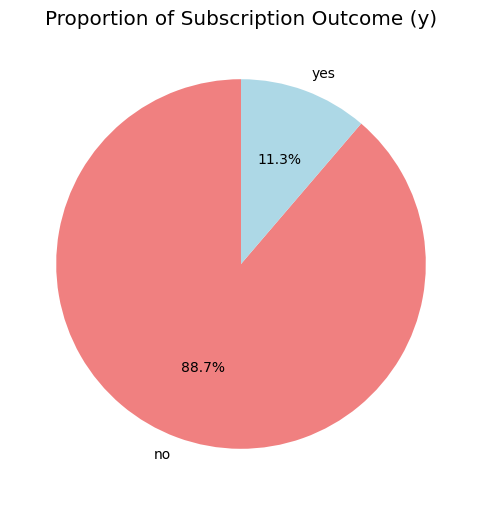

In [ ]:
# Figure 5: Pie chart for subscription outcome
plt.figure(figsize=(6, 6))
bank['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90)
plt.title("Proportion of Subscription Outcome (y)")
plt.ylabel("")
plt.show()


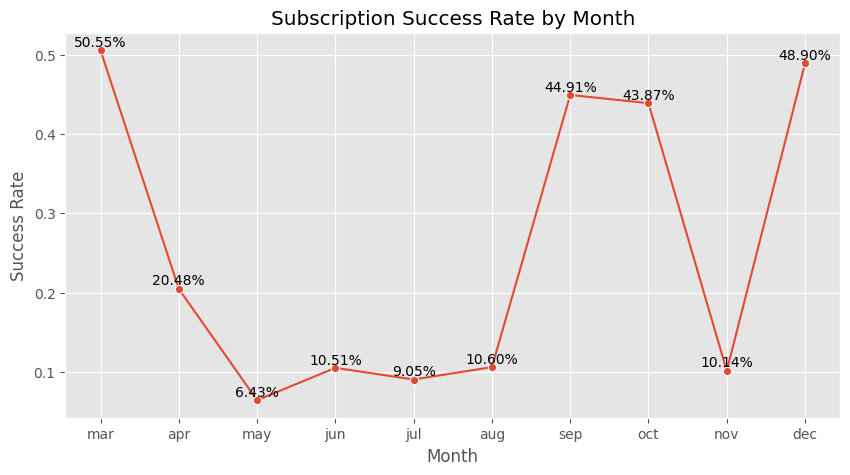

In [ ]:
# Figure 6: Line chart for success rates by month with labels
plt.figure(figsize=(10, 5))

# Compute success rates by month
success_rates = bank.groupby("month")["y"].apply(lambda x: (x == "yes").mean()).reset_index()

# Ensure months are in correct order (if not already)
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
success_rates['month'] = pd.Categorical(success_rates['month'], categories=month_order, ordered=True)
success_rates = success_rates.sort_values('month')

# Plot line chart
sns.lineplot(x=success_rates['month'], y=success_rates['y'], marker='o', linestyle='-')

# Add labels above each point
for i, txt in enumerate(success_rates['y']):
    plt.text(success_rates['month'].iloc[i], txt + 0.005, f"{txt:.2%}", ha='center', fontsize=10)

plt.title("Subscription Success Rate by Month")
plt.xlabel("Month")
plt.ylabel("Success Rate")
plt.show()


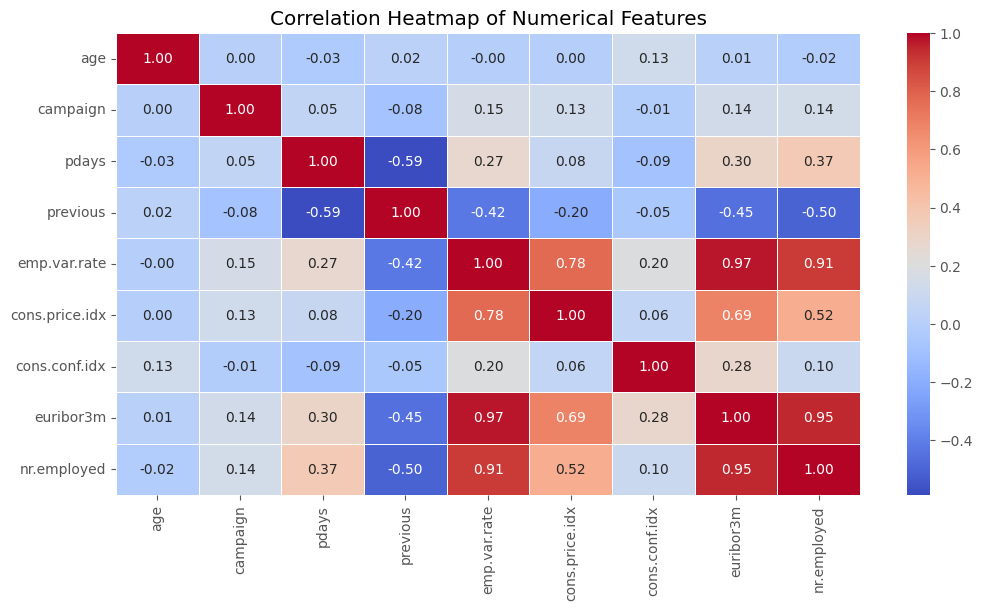

In [ ]:
# Figure 7: Heatmap for correlations
plt.figure(figsize=(12, 6))
sns.heatmap(bank.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


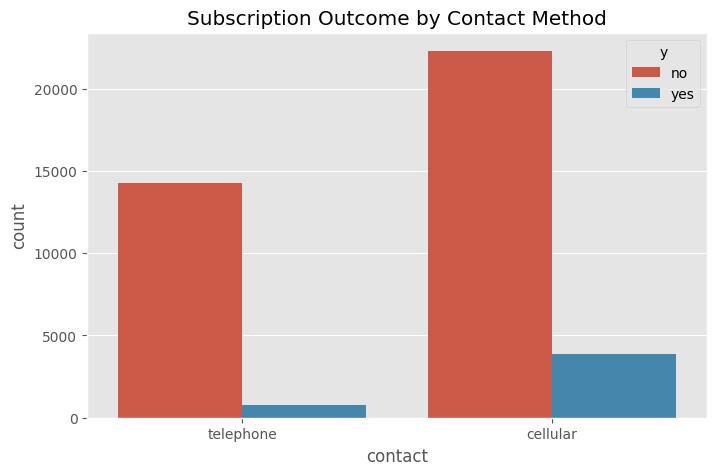

In [ ]:
# Figure 8: Count plot for contact method success rate
plt.figure(figsize=(8, 5))
sns.countplot(x=bank['contact'], hue=bank['y'])
plt.title("Subscription Outcome by Contact Method")
plt.show()


# Preprocessing with One-hot encoding


In [ ]:
# Identify categorical columns (dype = "object")
categorical_attributes = bank.select_dtypes(include=["object"]).columns.tolist()
#print("Categorical Features:", categorical_attributes)

# Encode target variable with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank['y'] = le.fit_transform(bank['y'])

# Check to make sure y is all numerical now
#print("\nChecking to see if y is numerical",bank["y"].value_counts())

# Identify binary (0/1) features
binary_features = [col for col in bank.columns if bank[col].nunique() == 2]  # Columns with only 2 unique values (0 & 1)

# Identify true numerical features (non-binary)
non_binary_features = [col for col in bank.select_dtypes(include=["int64", "float64"]).columns if col not in binary_features]

# Remove y if it got pulled into non_binary_features
if "y" in non_binary_features:
  non_binary_features.remove("y")

#print("Binary features (excluded from scaling):", binary_features)
#print("Numerical features to be scaled:", non_binary_features)

# Initialize StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to non-binary features
bank[non_binary_features] = scaler.fit_transform(bank[non_binary_features])


# Import OneHotEncoder, convert categorical features, update dataset
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = ohe.fit_transform(bank[categorical_attributes])
encoded_feature_names = ohe.get_feature_names_out(categorical_attributes)
encoded_bank = pd.DataFrame(encoded_features, columns=encoded_feature_names)
bank = pd.concat([bank.drop(categorical_attributes, axis=1), encoded_bank], axis=1)

# Check if full set is numerical now
#print("is dataset numerical?",bank.head())


# Check the transformed dataset
#print(bank.head())
bank.rename(columns={"y_1":"y"}, inplace = True) # y kept getting renamed into y_1
#print(bank['y'].value_counts())


In [ ]:
# Apply PCA to reduce dimensionality
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

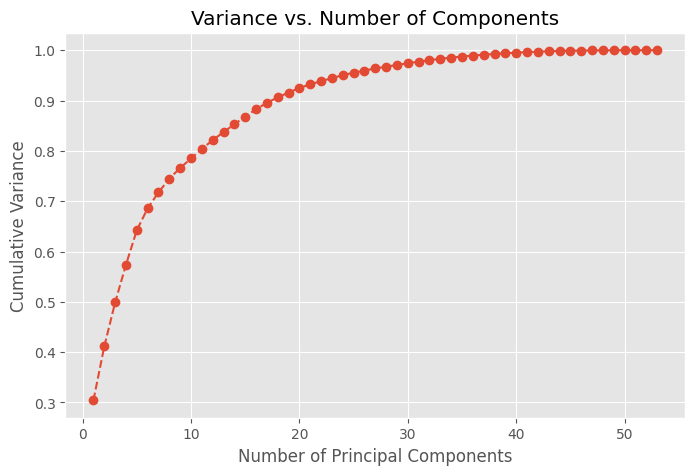

In [ ]:
# Test the PCA on all features then try just the numerical ones to see what happens

# Apply PCA on all features
pca = PCA(n_components=None)  # Keep all components initially
X_pca = pca.fit_transform(bank)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# Choose optimal number of components (18 components describes about 90%ish of variance)
optimal_components = 18

# Apply PCA again with the chosen number of components
pca = PCA(n_components=optimal_components)
X_pca_final = pca.fit_transform(bank)

# Convert PCA results into a DataFrame
bank_pca = pd.DataFrame(X_pca_final, columns=[f"PC{i+1}" for i in range(optimal_components)])

# Display the transformed dataset
bank_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,1.324657,-0.952342,1.486270,-0.050549,-0.675770,0.788213,0.113977,0.022708,-0.139761,-0.261350,-0.390760,0.496273,-0.040838,-0.580586,-0.602291,-0.073682,-0.300470,-0.467287
1,1.365205,-0.962601,1.511332,0.016299,-0.773613,0.880190,0.184620,0.172084,-0.777908,0.341711,-0.622264,0.788327,-0.418895,-0.370066,-0.756240,-0.043500,-0.328416,0.486222
2,1.302272,-0.391052,0.192457,-0.885925,0.037873,0.841655,0.234715,0.462441,-0.310320,0.925289,0.207672,0.948280,-0.433490,-0.369663,-0.624626,-0.007451,-0.231023,-0.290446
3,1.323209,-0.516715,0.450334,-0.736856,-0.086811,0.861223,0.207967,0.443486,0.127630,-0.177633,-0.397894,0.396388,-0.067973,-0.594578,-0.593354,-0.043224,-0.313760,-0.329619
4,1.321590,-0.911130,1.402140,-0.068858,-0.676760,0.836942,0.152153,0.056258,-0.638824,0.487637,-0.606635,0.908108,-0.381357,-0.372957,-0.680076,-0.085471,-0.305871,-0.428934


In [ ]:
# Get top contributing features for the first few principal components
pca_components = pd.DataFrame(pca.components_, columns=bank.columns)

# Show the top 10 absolute values for PC1 and PC2
print("Top features contributing to PC1:\n", pca_components.iloc[0].abs().nlargest(10))
print("\nTop features contributing to PC2:\n", pca_components.iloc[1].abs().nlargest(10))


Top features contributing to PC1:
 euribor3m               0.479421
emp.var.rate            0.477189
nr.employed             0.459174
cons.price.idx          0.361701
previous                0.304852
pdays                   0.225961
contact_telephone       0.108081
poutcome_nonexistent    0.106971
cons.conf.idx           0.099484
campaign                0.097686
Name: 0, dtype: float64

Top features contributing to PC2:
 pdays                   0.603128
previous                0.460701
cons.conf.idx           0.423357
age                     0.277422
cons.price.idx          0.270664
emp.var.rate            0.158317
euribor3m               0.145378
poutcome_nonexistent    0.115387
poutcome_success        0.101094
contact_telephone       0.080417
Name: 1, dtype: float64


#Observations
- My concern is that the onehotencoded variables could be dispropotionately be being dropped while we run the PCA
- There are some OHE variables present in the features contributing to the Principal Components from the PCA so there's the chance that meaningful ones are being retained?
- Going to run the k-means clustering on this PCA and see how it performs



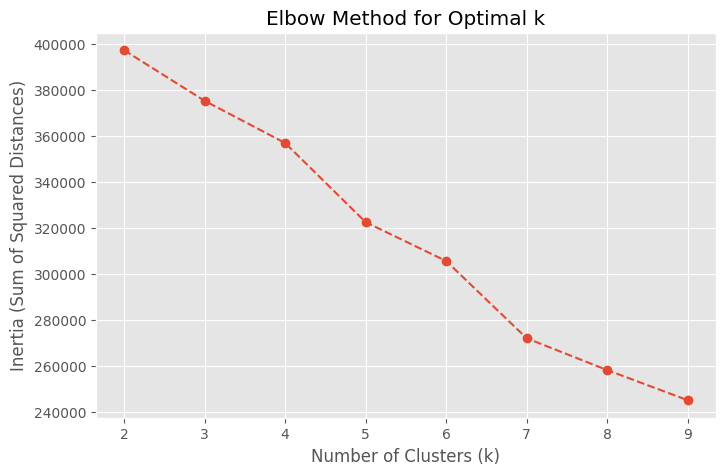

In [ ]:
from sklearn.cluster import KMeans

# Test different k values
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)  # Store sum of squared distances to cluster centers

# Plot Elbow Method to visually see where "best" k could be
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [ ]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=0)
bank["Cluster"] = kmeans.fit_predict(X_pca)

print(bank["Cluster"].value_counts())

Cluster
1    7900
6    7519
3    6078
2    5467
8    4973
7    2832
5    1875
9    1838
4    1515
0    1191
Name: count, dtype: int64


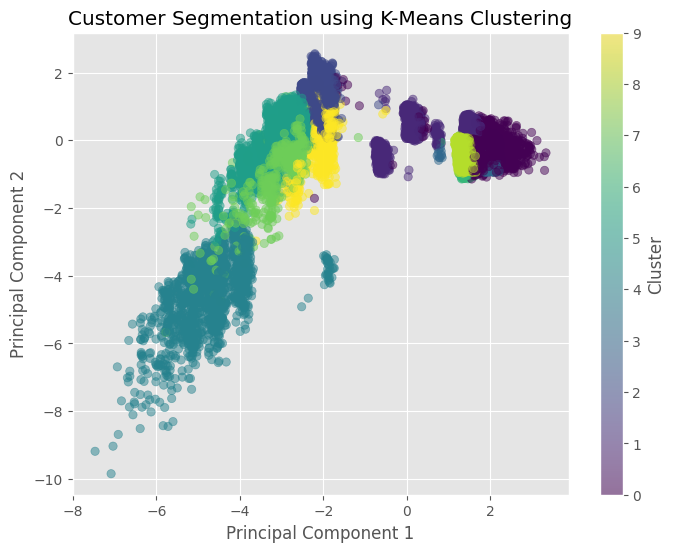

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=bank["Cluster"], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation using K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()




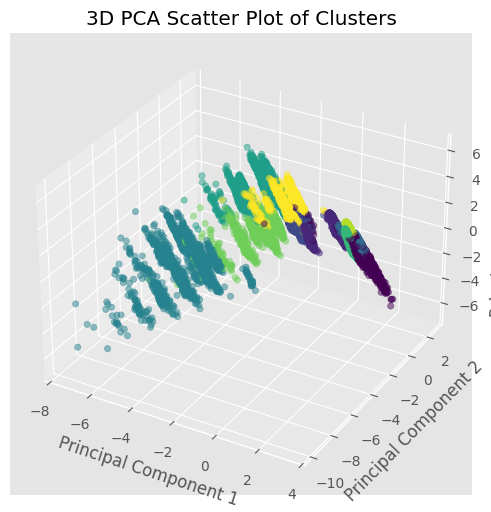

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create 3D scatter plot using PC1, PC2, and PC3
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of clusters
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=bank["Cluster"], cmap='viridis', alpha=0.5)

# Labels
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Scatter Plot of Clusters")

plt.show()


# <b>Density-Based-Clustering (DBSCAN)</b>

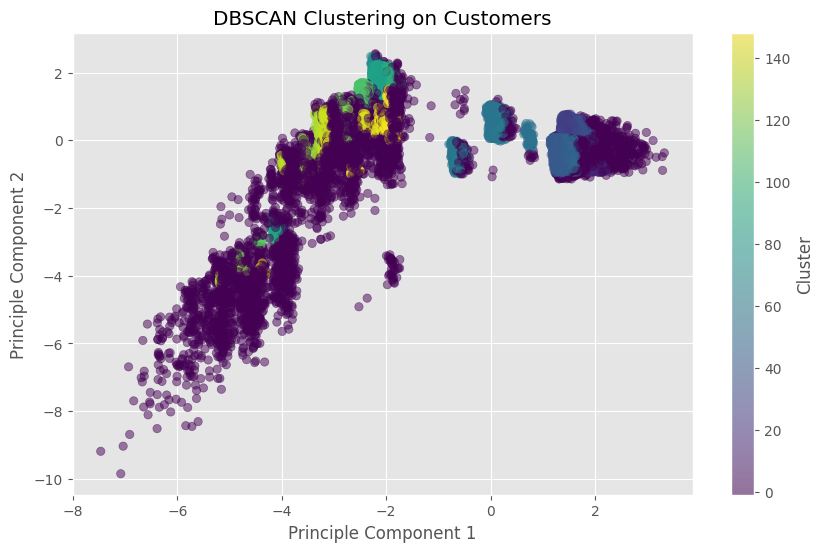

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Standardize numerical features before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bank[non_binary_features])

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
bank['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Scatter Plot of Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=bank["DBSCAN_Cluster"], cmap='viridis', alpha=0.5)
plt.title("DBSCAN Clustering on Customers")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.colorbar(label="Cluster")
plt.show()


# <b> Random Forest </b>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


# Prepare dataset (handle missing values and encode categorical variables)
X = bank[non_binary_features].fillna(bank[non_binary_features].median())
y = bank['y']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42, class_weight={0: 1, 1: 3})

rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8696285506190823
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      7303
         1.0       0.44      0.50      0.47       935

    accuracy                           0.87      8238
   macro avg       0.69      0.71      0.70      8238
weighted avg       0.88      0.87      0.87      8238



# <b>XGBoost </b>

In [ ]:
# Import XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost model with class weight adjustment (scale_pos_weight handles class imbalance)
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, scale_pos_weight=3, random_state=42)

# Fit the model to training data
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

# Display results
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:\n", classification_report_xgb)


XGBoost Accuracy: 0.8716921582908473
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      7303
         1.0       0.44      0.50      0.47       935

    accuracy                           0.87      8238
   macro avg       0.69      0.71      0.70      8238
weighted avg       0.88      0.87      0.88      8238



# <b> Cluster Comaprisons </b>

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   campaign                       41188 non-null  float64
 2   pdays                          41188 non-null  float64
 3   previous                       41188 non-null  float64
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_blue-collar                41188 non-null  float64
 10  job_entrepreneur               41188 non-null  float64
 11  job_housemaid                  41188 non-null  float64
 12  job_management                 41188 non-null 

In [ ]:
# Re-run K-Means
#k = 10
#kmeans = KMeans(n_clusters=k, random_state=0)
#bank["Cluster"] = kmeans.fit_predict(X_pca)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
bank['Cluster'] = kmeans.fit_predict(X_pca)

# Re-run DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
bank['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)


In [ ]:
print(bank[['Cluster', 'Cluster_DBSCAN']].head())


   Cluster  Cluster_DBSCAN
0        4               0
1        4               0
2        4               0
3        4               0
4        4               0


In [ ]:
print(bank.columns.tolist())  # Check all column names


['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y', 'Cluster', 'DBSCAN_Cluster', 'Cluster_DBSCAN']


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add principal components to the DataFrame
bank['PC1'] = X_pca[:, 0]
bank['PC2'] = X_pca[:, 1]

# Verify the new columns
print(bank[['PC1', 'PC2']].head())


        PC1       PC2
0  1.269177 -0.884510
1  1.269026 -0.909010
2  1.272062 -0.419006
3  1.271607 -0.492506
4  1.269177 -0.884510


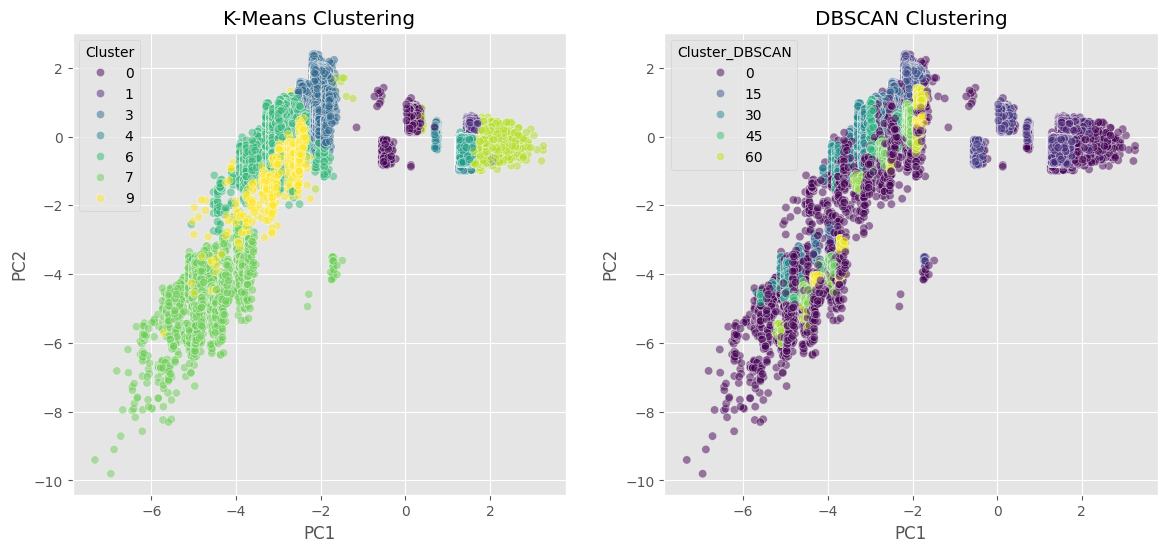

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Cluster' and 'Cluster_DBSCAN' exist
if 'Cluster' in bank.columns and 'Cluster_DBSCAN' in bank.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # K-Means Clustering Scatter Plot
    sns.scatterplot(data=bank, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.5, ax=axes[0])
    axes[0].set_title("K-Means Clustering")

    # DBSCAN Clustering Scatter Plot
    sns.scatterplot(data=bank, x='PC1', y='PC2', hue='Cluster_DBSCAN', palette='viridis', alpha=0.5, ax=axes[1])
    axes[1].set_title("DBSCAN Clustering")

    plt.show()
else:
    print("Error: 'Cluster' or 'Cluster_DBSCAN' column is missing from the dataset.")


# <b>Neural Network</b>

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input layer explicitly
autoencoder = Sequential([
    Input(shape=(X_scaled.shape[1],)),  # Proper way to define input shape
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_scaled.shape[1], activation='linear')
])


In [ ]:
#Training and Extracting Features
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming 'X' contains numerical features

# Define Autoencoder
input_layer = Input(shape=(X_scaled.shape[1],))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu', name="encoded_layer")(encoded)  # Bottleneck layer
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(X_scaled.shape[1], activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=10, batch_size=32, verbose=1)

# Extract Encoded Features
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("encoded_layer").output)
X_encoded = encoder.predict(X_scaled)  # Encoded dataset

# Convert to DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=[f'Enc_{i}' for i in range(X_encoded.shape[1])])


Epoch 1/10
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2449
Epoch 2/10
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0034
Epoch 3/10
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0018
Epoch 4/10
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0012
Epoch 5/10
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.6503e-04
Epoch 6/10
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.6155e-04
Epoch 7/10
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.7647e-04
Epoch 8/10
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.2681e-04
Epoch 9/10
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.0468e-04
Epoch 10/10
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.1592e-04
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# Clusters
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
encoded_df['KMeans_Cluster'] = kmeans.fit_predict(X_encoded)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
encoded_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_encoded)

# Check cluster distribution
print("K-Means Cluster Counts:\n", encoded_df['KMeans_Cluster'].value_counts())
print("DBSCAN Cluster Counts:\n", encoded_df['DBSCAN_Cluster'].value_counts())


K-Means Cluster Counts:
 KMeans_Cluster
1    27624
0    11412
2     2152
Name: count, dtype: int64
DBSCAN Cluster Counts:
 DBSCAN_Cluster
0     7715
3     6629
11    5694
4     5160
1     4309
      ... 
46      10
33      10
10      10
66      10
56       6
Name: count, Length: 68, dtype: int64


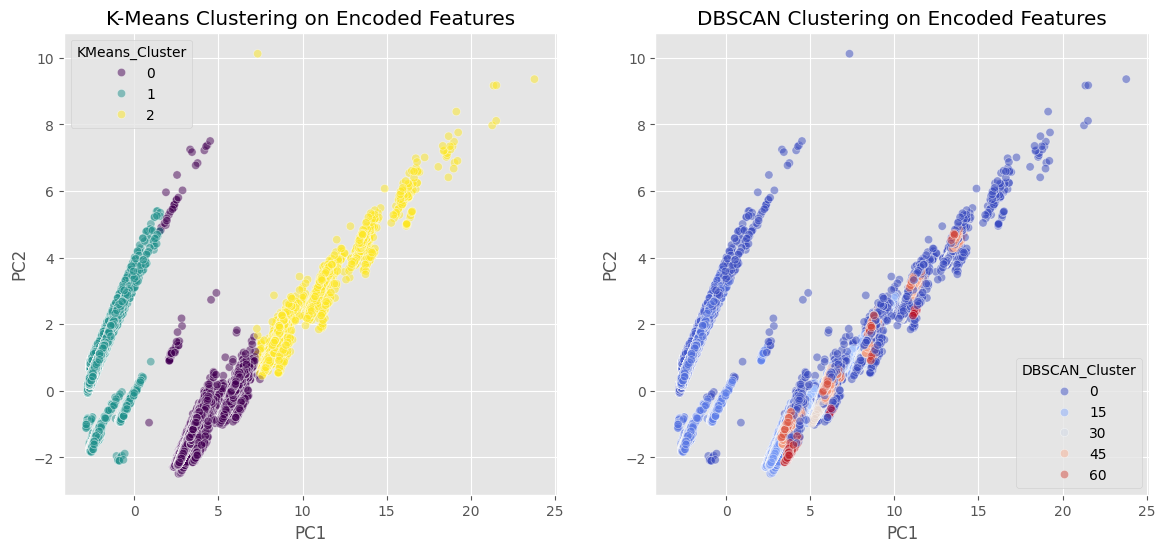

In [ ]:
#Visualize
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Add PCA-transformed features to DataFrame
encoded_df['PC1'] = X_pca[:, 0]
encoded_df['PC2'] = X_pca[:, 1]

# Plot K-Means Clustering
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=encoded_df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='viridis', alpha=0.5, ax=axes[0])
axes[0].set_title("K-Means Clustering on Encoded Features")

# Plot DBSCAN Clustering
sns.scatterplot(data=encoded_df, x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='coolwarm', alpha=0.5, ax=axes[1])
axes[1].set_title("DBSCAN Clustering on Encoded Features")

plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Compute Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(X_encoded, encoded_df['KMeans_Cluster'])

# Filter DBSCAN clusters to exclude noise (-1)
dbscan_clusters = encoded_df[encoded_df['DBSCAN_Cluster'] != -1]

# Compute Silhouette Score for DBSCAN (excluding noise points)
if len(dbscan_clusters) > 0:  # Ensure there are non-noise points
    silhouette_dbscan = silhouette_score(dbscan_clusters.iloc[:, :-3], dbscan_clusters['DBSCAN_Cluster'])
else:
    silhouette_dbscan = "N/A (All points considered noise)"

# Compute Davies-Bouldin Index (Lower is better)
db_kmeans = davies_bouldin_score(X_encoded, encoded_df['KMeans_Cluster'])

# Ensure DBSCAN has valid clusters before computing DB Index
if len(dbscan_clusters) > 0:
    db_dbscan = davies_bouldin_score(dbscan_clusters.iloc[:, :-3], dbscan_clusters['DBSCAN_Cluster'])
else:
    db_dbscan = "N/A (No valid clusters)"

# Print Results
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")

print(f"Davies-Bouldin Index (K-Means): {db_kmeans}")
print(f"Davies-Bouldin Index (DBSCAN): {db_dbscan}")


Silhouette Score (K-Means): 0.6523240208625793
Silhouette Score (DBSCAN): 0.318323841563617
Davies-Bouldin Index (K-Means): 0.7186759491869695
Davies-Bouldin Index (DBSCAN): 1.0985081042622935


In [ ]:
# Extract Encoded Features and Train-Test Split
from tensorflow.keras.models import Model

# Extract encoded features from the bottleneck layer
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("encoded_layer").output)
X_encoded = encoder.predict(X_scaled)  # Use encoded features for ML models

from sklearn.model_selection import train_test_split

# Define the target variable (subscribed or not)
y = bank['y']  # Assuming the target column is labeled 'y'

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



1288/1288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Neural Network- Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest on encoded features
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8965768390386016
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.94      7303
         1.0       0.64      0.20      0.31       935

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



In [ ]:
# Neural Network- XGBoost
from xgboost import XGBClassifier

# Train XGBoost model on encoded features
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8924496236950716
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      7303
         1.0       0.56      0.23      0.32       935

    accuracy                           0.89      8238
   macro avg       0.74      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238

